In [ ]:
# prompt: Construya una tabla llamada datosarchivos que tenga como filas los nombres de archivo y en las columnas los nombres normalizados de los metadatos de los archivos pdf que se encuentran en la siguiente carpeta /content/IA el contenido de la celda debe ser el valor del metadato.  El primer nombre de la columna se llama Archivo. Presente datosarchivos una tabla con un formato con colores vistosos en html y con ajuste de celda

import os
import pandas as pd
from tabulate import tabulate
import PyPDF2

def extract_metadata(pdf_path):
    """Extracts metadata from a PDF file."""
    with open(pdf_path, 'rb') as pdf_file:
        pdf_reader = PyPDF2.PdfReader(pdf_file)
        metadata = pdf_reader.metadata
    return metadata

def normalize_metadata_keys(metadata):
    """Normalizes metadata keys for better table presentation."""
    normalized_metadata = {}
    for key, value in metadata.items():
        if key:
            normalized_key = key.replace('/', '_').replace(' ', '_')
            normalized_metadata[normalized_key] = value
    return normalized_metadata


folder_path = '/content/IA'
data = []
for filename in os.listdir(folder_path):
    if filename.endswith('.pdf'):
        file_path = os.path.join(folder_path, filename)
        try:
            metadata = extract_metadata(file_path)
            normalized_metadata = normalize_metadata_keys(metadata)
            row = {'Archivo': filename}
            row.update(normalized_metadata)
            data.append(row)
        except Exception as e:
            print(f"Error processing {filename}: {e}")

datosarchivos = pd.DataFrame(data)
datosarchivos = datosarchivos.fillna('')


# Create an HTML table with styling and cell wrapping
html_table = tabulate(datosarchivos, headers='keys', tablefmt='html', showindex=False)

# Add some basic styling
html_table = html_table.replace('<table border="1" class="dataframe">', '<table border="1" class="dataframe" style="border-collapse: collapse; width: 100%; font-family: sans-serif;">')
html_table = html_table.replace('<th>', '<th style="background-color: #f2f2f2; padding: 8px; text-align: left;">')
html_table = html_table.replace('<td>', '<td style="padding: 8px; border: 1px solid #ddd; white-space: pre-wrap;">')

from IPython.display import HTML

HTML(html_table)

Archivo,_Author,_CreationDate,_Creator,_Keywords,_ModDate,_Producer,_Subject,_Title,_Trapped
ImpactPerspectives.pdf,"Padilla Piernas, Juana María",D:20240830102553+02'00',Microsoft® Word para Microsoft 365,Inteligencia Artificial Generativa; UTAUT; TAM; VAM; educación superior; profesores; AETGE; Nuevas Tecnologías.,D:20240830103220+02'00',Microsoft® Word para Microsoft 365,European Public & Social Innovation Review; https://doi.org/10.31637/epsir-2024-595,Impacto y Perspectivas de la Inteligencia Artificial Generativa en la Educación Superior: Un Estudio sobre la Percepción y Adopción Docente usando el modelo AETGE/GATE,
PracticalApplications.pdf,"Guerra Guerrero, César Octavio",D:20240925123116+02'00',Microsoft® Word para Microsoft 365,inteligencia artificial; docencia; educación; caso de estudio; inteligencia artificial generativa; productividad académica; educación superior; ingeniería en diseño multimedia.,D:20240925132052+02'00',Microsoft® Word para Microsoft 365,European Public & SocialInnovation Review; https://doi.org/10.31637/epsir-2024-816,Aplicaciones Prácticas de la Inteligencia Artificial Generativa en la Labor Docente: El Caso de la Ingeniería en Diseño Multimedia,
Predictingteacher.pdf,Nausícaä,D:20221204113440+01'00',Microsoft® Word para Microsoft 365,,D:20221204113440+01'00',Microsoft® Word para Microsoft 365,,,
ArtificialIntelligence.pdf,María del Mar Sánchez Vera,D:20240127122357+01'00',Adobe InDesign CC 2015 (Macintosh),inteligencia artificial; inteligencia artificial generativa; educación; enseñanza; aprendizaje; profesión docente,D:20240127122520+01'00',Adobe PDF Library 15.0,,La inteligencia artificial como recurso docente: usos y posibilidades para el profesorado,
ReinventingTeaching.pdf,Antonio Carrasco Rodríguez,D:20230704114326+02'00',Adobe InDesign CC 13.0 (Macintosh),Carlos V; enseñanza secundaria; Historia Moderna; ChatGPT; innovación docente; Charles V; secondary education; Early Modern History; ChatGPT; educational innovation,D:20230704114502+02'00',Adobe PDF Library 15.0,"Studia Historica: Historia Moderna, 2023, vol. 45, n. 1, pp. 101-145",Reinventando la enseñanza de la Historia Moderna en Secundaria: la utilización de ChatGPT para potenciar el aprendizaje y la innovación docente = Reinventing the teaching of Early Modern History in Secondary School: the use of ChatGPT to enhance learning and educational innovation,/False


In [ ]:
# prompt: descargue la tabla en formato excel

# Export the DataFrame to an Excel file
datosarchivos.to_excel('metadata_table.xlsx', index=False)

# Download the Excel file (if running in a notebook environment like Google Colab)
from google.colab import files
files.download('metadata_table.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

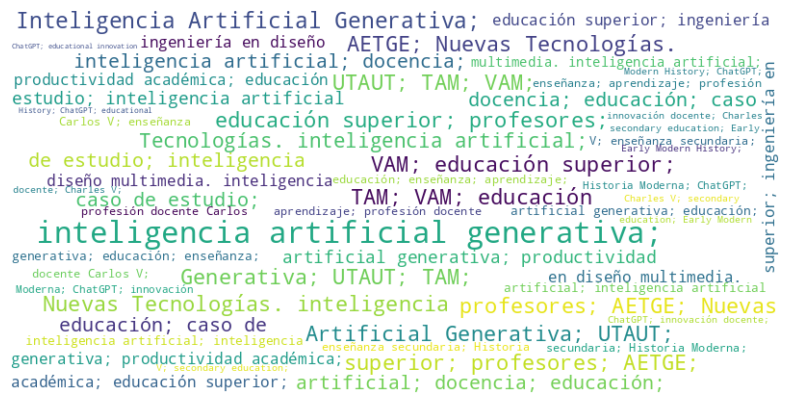

In [ ]:
# prompt: con los datos de la columna _Keywords cree una nube de trigramas

!pip install wordcloud

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import ngrams

# Assuming 'datosarchivos' DataFrame is already defined and contains a '_Keywords' column

# Combine all keywords into a single string
all_keywords = ' '.join(datosarchivos['_Keywords'].astype(str).tolist())

# Generate trigrams
trigrams = list(ngrams(all_keywords.split(), 3))

# Create a dictionary to count the frequency of each trigram
trigram_counts = {}
for trigram in trigrams:
  trigram_str = ' '.join(trigram)
  if trigram_str in trigram_counts:
    trigram_counts[trigram_str] += 1
  else:
    trigram_counts[trigram_str] = 1

# Create a word cloud from the trigram counts
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(trigram_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# prompt: liste los datos de la columna _CreationDate y cree una nueva columna llamado año al extraer los dato de la posicion 2 a la 6

# Extract year from _CreationDate column and create a new 'Año' column
datosarchivos['Año'] = datosarchivos['_CreationDate'].str[2:6]

# Print the updated DataFrame
print(datosarchivos)

                      Archivo                         _Author  \
0      ImpactPerspectives.pdf    Padilla Piernas, Juana María   
1   PracticalApplications.pdf  Guerra Guerrero, César Octavio   
2       Predictingteacher.pdf                        Nausícaä   
3  ArtificialIntelligence.pdf      María del Mar Sánchez Vera   
4     ReinventingTeaching.pdf      Antonio Carrasco Rodríguez   

             _CreationDate                            _Creator  \
0  D:20240830102553+02'00'  Microsoft® Word para Microsoft 365   
1  D:20240925123116+02'00'  Microsoft® Word para Microsoft 365   
2  D:20221204113440+01'00'  Microsoft® Word para Microsoft 365   
3  D:20240127122357+01'00'  Adobe InDesign CC 2015 (Macintosh)   
4  D:20230704114326+02'00'  Adobe InDesign CC 13.0 (Macintosh)   

                                           _Keywords                 _ModDate  \
0  Inteligencia Artificial Generativa; UTAUT; TAM...  D:20240830103220+02'00'   
1  inteligencia artificial; docencia; educación; .

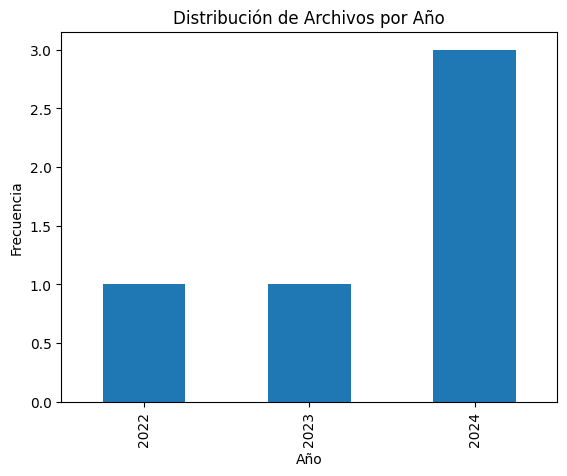

In [ ]:
# prompt: convierta la columna Año en formato número entero y cree un diagrama de barras

# Convert 'Año' column to integer, handling potential errors
datosarchivos['Año'] = pd.to_numeric(datosarchivos['Año'], errors='coerce').fillna(0).astype(int)

# Create a bar chart of the 'Año' column
datosarchivos['Año'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Distribución de Archivos por Año')
plt.show()

In [ ]:
# prompt: cargar los pdf que se encuentran en la siguiente carpeta /content/IA y preproceselos para facilitar el análisis de contenido

import os
import PyPDF2
from io import StringIO

def preprocess_pdf(pdf_path):
  """Extracts text from a PDF file and performs basic preprocessing."""
  try:
    with open(pdf_path, 'rb') as pdf_file:
      pdf_reader = PyPDF2.PdfReader(pdf_file)
      text = ''
      for page_num in range(len(pdf_reader.pages)):
        page = pdf_reader.pages[page_num]
        text += page.extract_text()

      # Basic preprocessing (you can customize this further)
      text = text.lower()  # Convert to lowercase
      text = text.replace('\n', ' ')  # Remove newlines
      # You can add more preprocessing steps here, like removing punctuation, stop words, etc.

      return text

  except Exception as e:
    print(f"Error processing {pdf_path}: {e}")
    return None


folder_path = '/content/IA'  # Replace with your folder path
for filename in os.listdir(folder_path):
  if filename.endswith('.pdf'):
    file_path = os.path.join(folder_path, filename)
    processed_text = preprocess_pdf(file_path)
    if processed_text:
      # Save the preprocessed text to a new file (optional)
      output_filename = os.path.splitext(filename)[0] + '_processed.txt'
      output_filepath = os.path.join(folder_path, output_filename)
      with open(output_filepath, 'w') as outfile:
        outfile.write(processed_text)

      print(f"Processed {filename} and saved to {output_filename}")

Processed ImpactPerspectives.pdf and saved to ImpactPerspectives_processed.txt
Processed PracticalApplications.pdf and saved to PracticalApplications_processed.txt
Processed Predictingteacher.pdf and saved to Predictingteacher_processed.txt
Processed ArtificialIntelligence.pdf and saved to ArtificialIntelligence_processed.txt
Processed ReinventingTeaching.pdf and saved to ReinventingTeaching_processed.txt


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


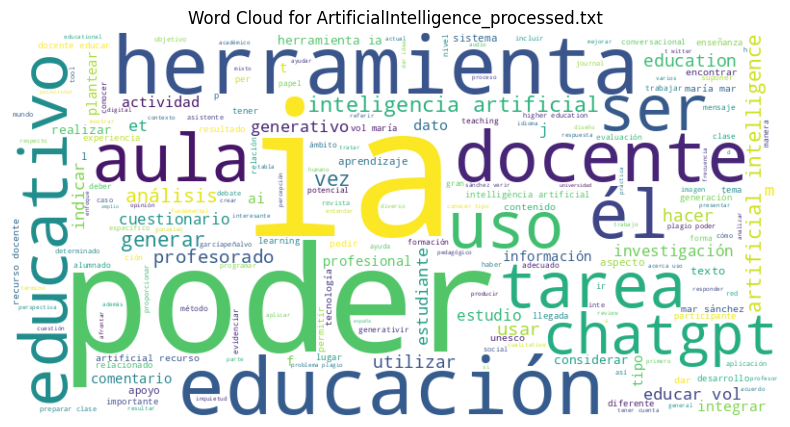

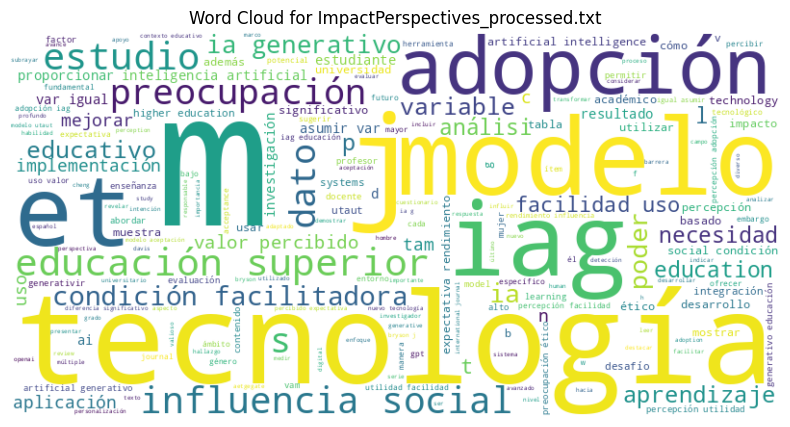

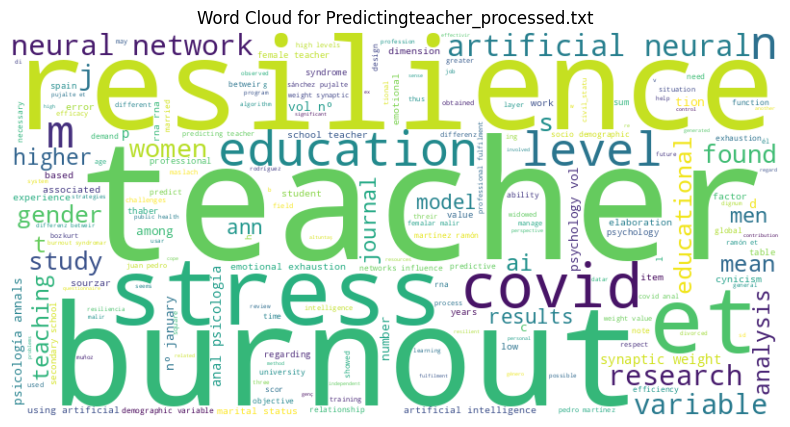

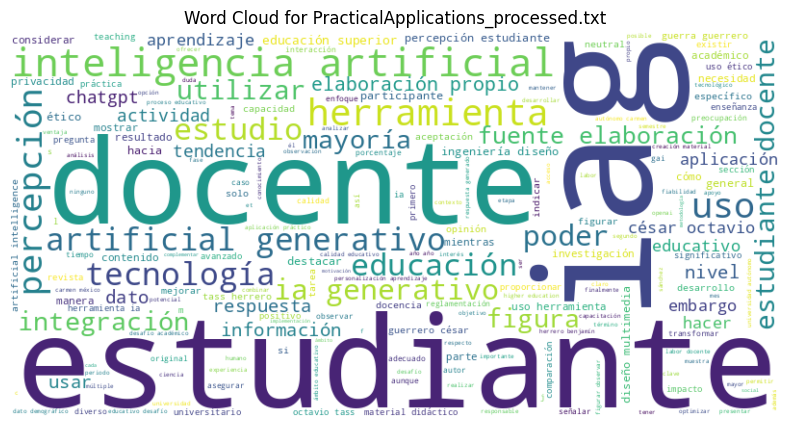

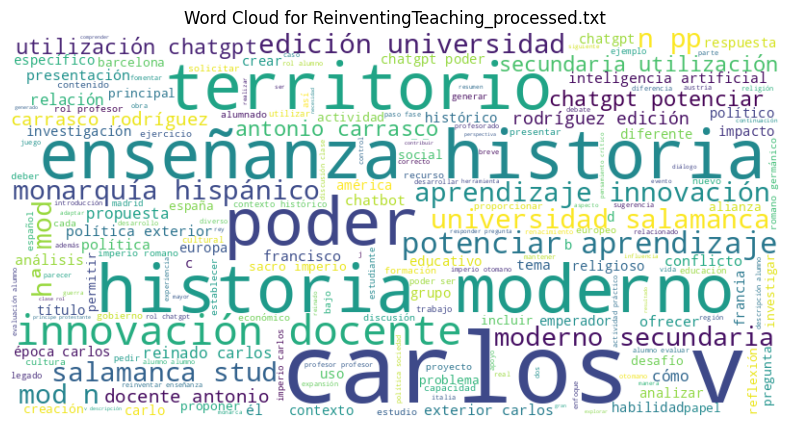

In [ ]:
# prompt: con los textos preprocesados haga Tokenización y reducción de ruido en español y luego cree una nube de palabras para cada texto

!pip install nltk
!pip install spacy

import nltk
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')

# Load Spanish language model for spaCy
!python -m spacy download es_core_news_sm
nlp = spacy.load("es_core_news_sm")

def tokenize_and_reduce_noise(text):
  """Tokenizes and reduces noise in Spanish text."""

  doc = nlp(text)

  tokens = [token.text for token in doc if not token.is_stop and token.is_alpha]
  return tokens


def create_wordcloud(tokens):
  """Creates a word cloud from a list of tokens."""

  text = ' '.join(tokens)
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

folder_path = '/content/IA'  # Replace with your folder path
for filename in os.listdir(folder_path):
  if filename.endswith('_processed.txt'):
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'r') as infile:
      processed_text = infile.read()

    tokens = tokenize_and_reduce_noise(processed_text)
    print(f"Word cloud for {filename}:")
    create_wordcloud(tokens)


In [ ]:
# prompt: con los textos preprocesados cree un solo texto llamado TextoCompleto

TextoCompleto = ""
folder_path = '/content/IA'  # Replace with your folder path
for filename in os.listdir(folder_path):
  if filename.endswith('_processed.txt'):
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'r') as infile:
      processed_text = infile.read()
    TextoCompleto += processed_text

print("TextoCompleto creado exitosamente.")

TextoCompleto creado exitosamente.


Word cloud for TextoCompleto:


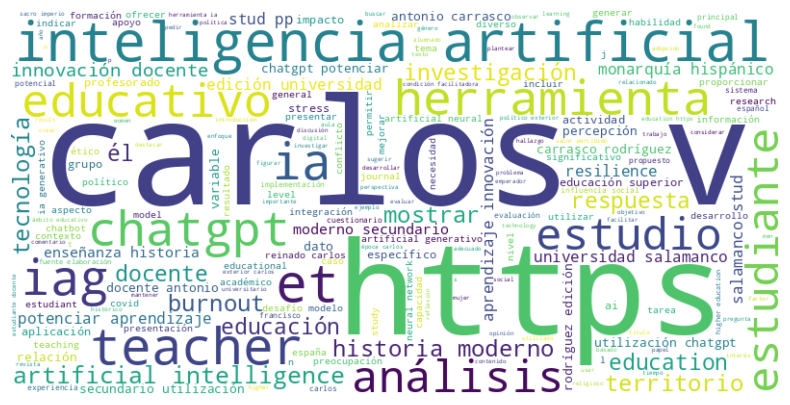

In [ ]:
# prompt: haga Tokenización y reducción de ruido en español sobre TextoCompleto y luego cree una nube de palabras

tokens = tokenize_and_reduce_noise(TextoCompleto)
print(f"Word cloud for TextoCompleto:")
create_wordcloud(tokens)

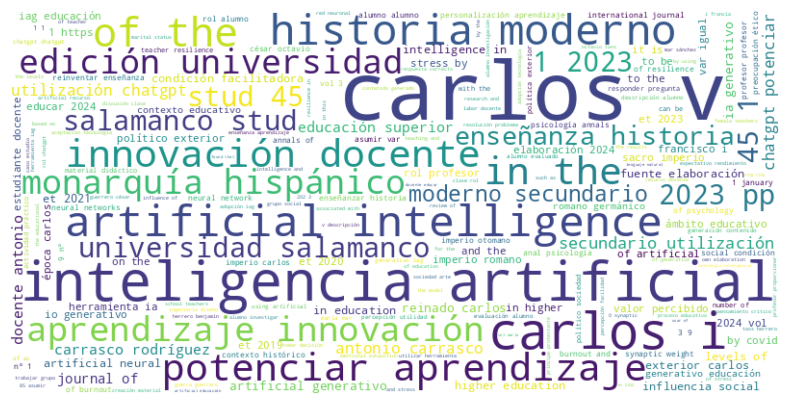

In [ ]:
# prompt: con el texto preprocesado en la instrucción anterior cree una nube de bigramas

from nltk import bigrams

def create_bigram_cloud(tokens):
  """Creates a bigram word cloud from a list of tokens."""

  bigrams_list = list(bigrams(tokens))
  bigram_counts = {}
  for bigram in bigrams_list:
    bigram_str = ' '.join(bigram)
    if bigram_str in bigram_counts:
      bigram_counts[bigram_str] += 1
    else:
      bigram_counts[bigram_str] = 1

  wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_counts)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()


# Assuming 'tokens' is the list of tokens from the preprocessed text
create_bigram_cloud(tokens)

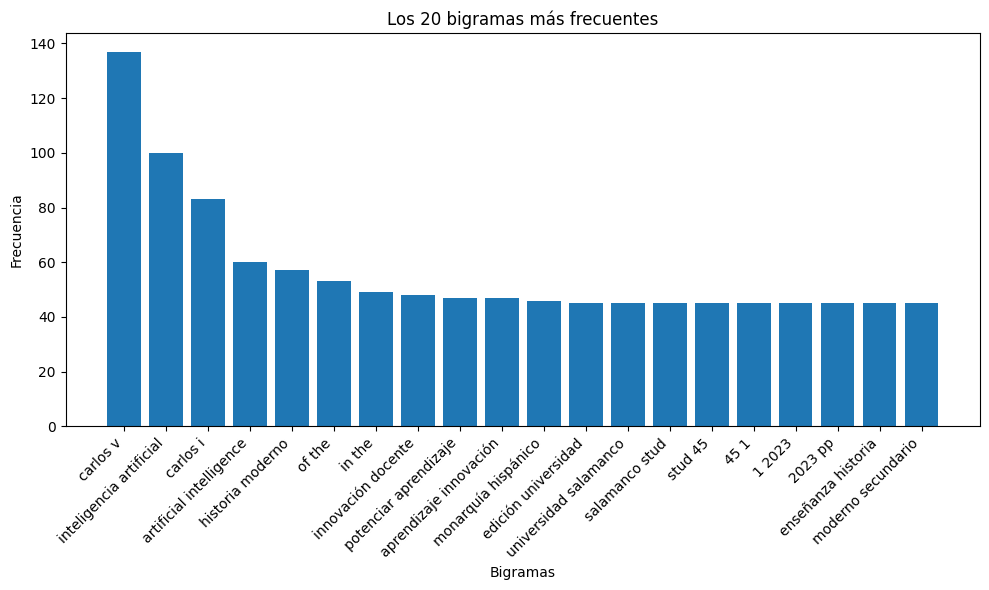

In [ ]:
# prompt: cree un diagrama de barras con los 20 bigramas más frecuentes indentificados en la instrucción anterior

from collections import Counter
import matplotlib.pyplot as plt

def create_bigram_bar_chart(tokens, top_n=20):
  """Creates a bar chart of the top N bigrams."""

  bigrams_list = list(bigrams(tokens))
  bigram_counts = Counter(bigrams_list)
  top_bigrams = bigram_counts.most_common(top_n)

  bigram_phrases = [' '.join(bigram) for bigram, count in top_bigrams]
  counts = [count for bigram, count in top_bigrams]

  plt.figure(figsize=(10, 6))
  plt.bar(bigram_phrases, counts)
  plt.xlabel('Bigramas')
  plt.ylabel('Frecuencia')
  plt.title(f'Los {top_n} bigramas más frecuentes')
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
  plt.tight_layout()
  plt.show()


# Assuming 'tokens' is the list of tokens from the preprocessed text
create_bigram_bar_chart(tokens)

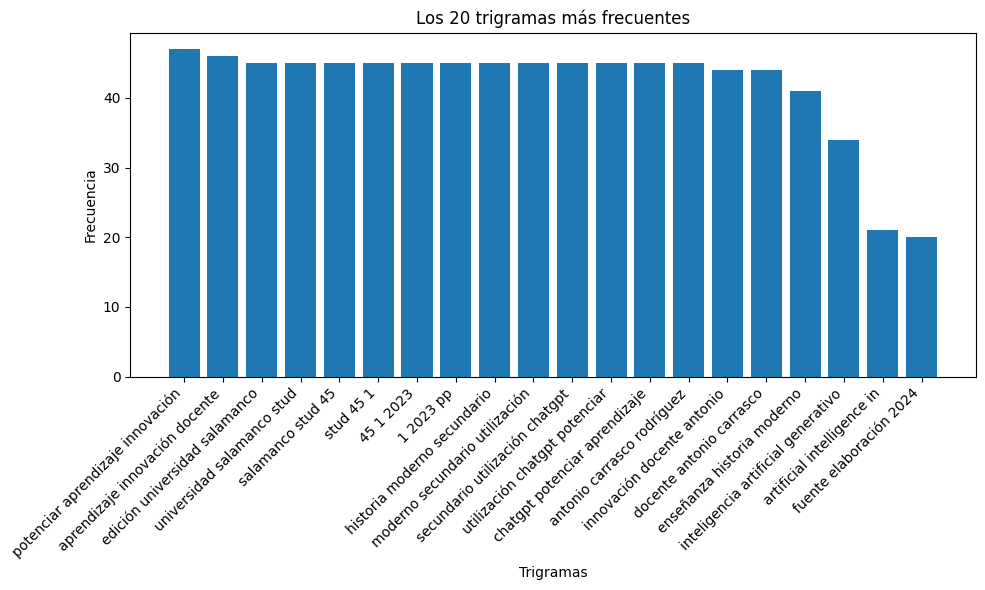

In [ ]:
# prompt: con el texto preprocesado extraer los trigramas mas frecuentes y almacenarlos en una variable llamada trigrama y cree un diagrama de barras con los 20 mas frecuentes

def create_trigram_bar_chart(tokens, top_n=20):
  """Creates a bar chart of the top N trigrams."""

  trigrams_list = list(ngrams(tokens, 3))
  trigram_counts = Counter(trigrams_list)
  top_trigrams = trigram_counts.most_common(top_n)

  trigram_phrases = [' '.join(trigram) for trigram, count in top_trigrams]
  counts = [count for trigram, count in top_trigrams]

  plt.figure(figsize=(10, 6))
  plt.bar(trigram_phrases, counts)
  plt.xlabel('Trigramas')
  plt.ylabel('Frecuencia')
  plt.title(f'Los {top_n} trigramas más frecuentes')
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
  plt.tight_layout()
  plt.show()

# Assuming 'tokens' is the list of tokens from the preprocessed text
trigramas = list(ngrams(tokens, 3))
create_trigram_bar_chart(tokens)

In [ ]:
# prompt: extraer todas las frases en TextoCompleto que contengan el bigrama pensamiento crítico en formato html destacando el bigrama

def highlight_bigram(text, bigram):
  """Highlights the specified bigram within a text."""
  highlighted_text = text.replace(bigram, f"<mark>{bigram}</mark>")
  return highlighted_text

def find_sentences_with_bigram(text, bigram):
  """Finds sentences containing the specified bigram in a text."""
  sentences = nltk.sent_tokenize(text)
  sentences_with_bigram = []
  for sentence in sentences:
    if bigram in sentence:
      sentences_with_bigram.append(sentence)
  return sentences_with_bigram


bigram_to_search = "pensamiento crítico"
sentences_with_bigram = find_sentences_with_bigram(TextoCompleto, bigram_to_search)


html_output = "<h2>Frases que contienen el bigrama 'pensamiento crítico'</h2>"
html_output += "<ul>"
for sentence in sentences_with_bigram:
  highlighted_sentence = highlight_bigram(sentence, bigram_to_search)
  html_output += f"<li>{highlighted_sentence}</li>"
html_output += "</ul>"

HTML(html_output)

In [ ]:
# prompt: extraer todas las frases en TextoCompleto que contengan la palabra chatgpt en formato html destacando el bigrama

def highlight_bigram(text, bigram):
  """Highlights the specified bigram within a text."""
  highlighted_text = text.replace(bigram, f"<mark>{bigram}</mark>")
  return highlighted_text

def find_sentences_with_bigram(text, bigram):
  """Finds sentences containing the specified bigram in a text."""
  sentences = nltk.sent_tokenize(text)
  sentences_with_bigram = []
  for sentence in sentences:
    if bigram in sentence:
      sentences_with_bigram.append(sentence)
  return sentences_with_bigram

bigram_to_search = "chatgpt"
sentences_with_bigram = find_sentences_with_bigram(TextoCompleto, bigram_to_search)


html_output = "<h2>Frases que contienen el bigrama 'chatgpt'</h2>"
html_output += "<ul>"
for sentence in sentences_with_bigram:
  highlighted_sentence = highlight_bigram(sentence, bigram_to_search)
  html_output += f"<li>{highlighted_sentence}</li>"
html_output += "</ul>"

HTML(html_output)

In [ ]:
# prompt: Extraer frases en el TextoCompleto  que contengan el bigrama inteligencia artificial o una de las palabras "IA" o " ia " en formato html destacando el bigrama o la palabra

def highlight_phrase(text, phrase):
  """Highlights the specified phrase within a text using HTML markup."""
  highlighted_text = text.replace(phrase, f"<mark>{phrase}</mark>")
  return highlighted_text

def find_sentences_with_phrase(text, phrase):
  """Finds sentences containing the specified phrase in a text."""
  sentences = nltk.sent_tokenize(text)
  sentences_with_phrase = []
  for sentence in sentences:
    if phrase in sentence.lower():  # Case-insensitive search
      sentences_with_phrase.append(sentence)
  return sentences_with_phrase

# Define the phrases to search for
phrases_to_search = ["inteligencia artificial", "IA", " ia "]

html_output = ""

for phrase in phrases_to_search:
  sentences_with_phrase = find_sentences_with_phrase(TextoCompleto, phrase)

  if sentences_with_phrase:
    html_output += f"<h2>Frases que contienen '{phrase}'</h2>"
    html_output += "<ul>"
    for sentence in sentences_with_phrase:
      highlighted_sentence = highlight_phrase(sentence, phrase)
      html_output += f"<li>{highlighted_sentence}</li>"
    html_output += "</ul>"

HTML(html_output)

In [ ]:
# prompt: presente en una tabla los 30 bigramas mas frecuentes cuya longitud de cada palabra sea superior a los 3 caracteres

def create_bigram_table(tokens, top_n=30):
  """Creates a table of the top N bigrams where both words have a length greater than 3."""

  bigrams_list = list(bigrams(tokens))
  bigram_counts = Counter(bigrams_list)
  top_bigrams = bigram_counts.most_common(top_n)

  table_data = []
  for bigram, count in top_bigrams:
    word1, word2 = bigram
    if len(word1) > 3 and len(word2) > 3:
      table_data.append([bigram, count])

  if table_data:
    df = pd.DataFrame(table_data, columns=['Bigrama', 'Frecuencia'])
    display(HTML(df.to_html(index=False)))
  else:
    print("No se encontraron bigramas con ambas palabras de longitud superior a 3.")


create_bigram_table(tokens)

Bigrama,Frecuencia
"(inteligencia, artificial)",100
"(artificial, intelligence)",60
"(historia, moderno)",57
"(innovación, docente)",48
"(potenciar, aprendizaje)",47
"(aprendizaje, innovación)",47
"(monarquía, hispánico)",46
"(edición, universidad)",45
"(universidad, salamanco)",45
"(salamanco, stud)",45


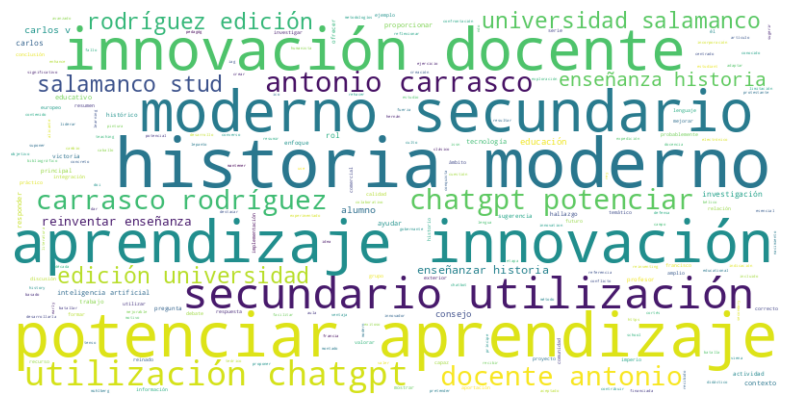

In [ ]:
# prompt: construya una nube de palabras a partir de las frases que tienen al mismo tiempo la palabra aprendizaje y la palabra innovación.  Antes de construir la nube de palabras haga Tokenización y reducción de ruido en español

def create_wordcloud_from_phrases(text, phrase1, phrase2):
  """Creates a word cloud from phrases containing both phrase1 and phrase2."""

  sentences = nltk.sent_tokenize(text)
  relevant_phrases = []
  for sentence in sentences:
    if phrase1 in sentence and phrase2 in sentence:
      relevant_phrases.append(sentence)

  if not relevant_phrases:
    print("No se encontraron frases que contengan ambas palabras clave.")
    return

  text_for_wordcloud = ' '.join(relevant_phrases)

  tokens = tokenize_and_reduce_noise(text_for_wordcloud)
  if not tokens:
    print("No se encontraron tokens válidos en las frases.")
    return

  text_for_cloud = ' '.join(tokens)
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_cloud)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()


create_wordcloud_from_phrases(TextoCompleto, "aprendizaje", "innovación")

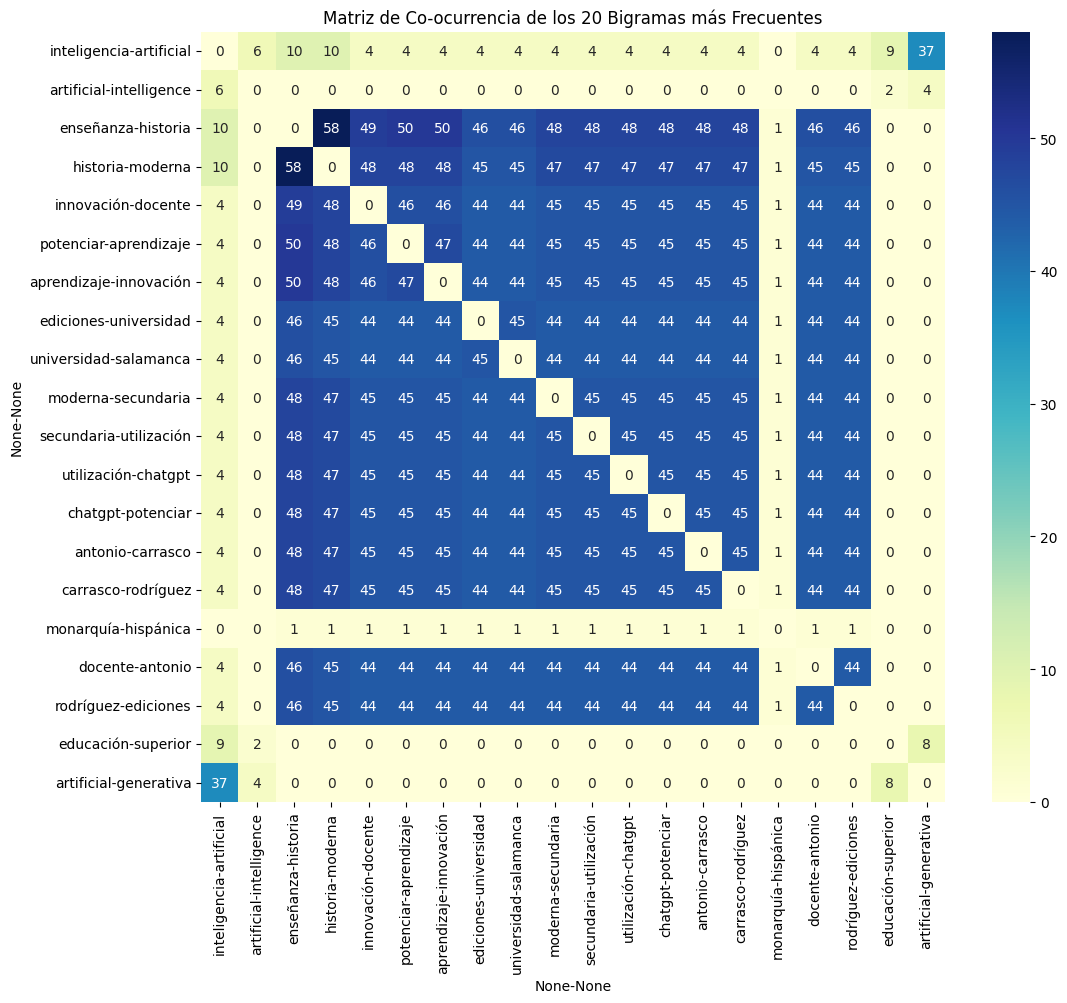

In [ ]:
# prompt: Con el TextoCompleto procesado con Tokenización y reducción de ruido en español presente un mapa de calor de la co-currencia de las 20 bigramas más frecuentes que coincidan en las mismas frases.

import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

def create_cooccurrence_heatmap(tokens, top_n=20):
  """Creates a heatmap of bigram co-occurrence within sentences."""

  bigrams_list = list(bigrams(tokens))
  bigram_counts = Counter(bigrams_list)
  top_bigrams = bigram_counts.most_common(top_n)

  sentences = nltk.sent_tokenize(TextoCompleto)
  cooccurrence_matrix = defaultdict(lambda: defaultdict(int))

  for sentence in sentences:
    sentence_bigrams = list(bigrams([token for token in nltk.word_tokenize(sentence) if token in tokens]))

    for bigram1 in sentence_bigrams:
      for bigram2 in sentence_bigrams:
          if bigram1 != bigram2:
              cooccurrence_matrix[bigram1][bigram2] += 1

  # Create a DataFrame from the co-occurrence matrix
  df_cooccurrence = pd.DataFrame(cooccurrence_matrix)
  df_cooccurrence = df_cooccurrence.fillna(0)

  # Only keep the top bigrams as rows and columns
  top_bigram_phrases = [bigram for bigram, _ in top_bigrams]
  df_cooccurrence = df_cooccurrence.loc[top_bigram_phrases, top_bigram_phrases]

  # Create the heatmap
  plt.figure(figsize=(12, 10))
  sns.heatmap(df_cooccurrence, annot=True, fmt=".0f", cmap="YlGnBu")
  plt.title("Matriz de Co-ocurrencia de los 20 Bigramas más Frecuentes")
  plt.show()


create_cooccurrence_heatmap(tokens)

In [ ]:
# prompt: Con el TextoCompleto procesado con Tokenización y reducción de ruido en español, seleccione los 20 bigramas más frecuentes que no tienen alguna de las siguientes palabras : carrasco, ediciones o salamanca. Cree una tabla en el que cada bigrama es una fila y dos columnas, el Nombre y Numero de Frases. El contenido de cada celda es el siguiente: En la primera columna el Bigrama y en la segunda el recuento frases que contengan las palabras del bigrama en cualquier orden

def create_bigram_table_without_words(tokens, excluded_words, top_n=20):
  """Creates a table of the top N bigrams, excluding specified words."""

  bigrams_list = list(bigrams(tokens))
  bigram_counts = Counter(bigrams_list)
  top_bigrams = bigram_counts.most_common(top_n)

  table_data = []
  for bigram, count in top_bigrams:
    word1, word2 = bigram
    if word1.lower() not in excluded_words and word2.lower() not in excluded_words:
      table_data.append([bigram, count])

  if table_data:
    df = pd.DataFrame(table_data, columns=['Bigrama', 'Numero de Frases'])
    display(HTML(df.to_html(index=False)))
  else:
    print("No se encontraron bigramas que cumplan con los criterios.")


excluded_words = ['carrasco', 'ediciones', 'salamanca']
create_bigram_table_without_words(tokens, excluded_words)

Bigrama,Numero de Frases
"(inteligencia, artificial)",100
"(artificial, intelligence)",61
"(enseñanza, historia)",59
"(historia, moderna)",57
"(innovación, docente)",48
"(potenciar, aprendizaje)",47
"(aprendizaje, innovación)",47
"(moderna, secundaria)",45
"(secundaria, utilización)",45
"(utilización, chatgpt)",45


In [ ]:
# prompt: Cree un archivo Excel en la que cada que cada hoja corresponda a los primeros 5 bigramas de la tabla anterior y el contenido de cada hoja sean las frases que contengan las palabras del bigrama en cualquier orden

from openpyxl import Workbook
from collections import defaultdict

def create_excel_with_bigram_sheets(text, top_n_bigrams=5):
  """Creates an Excel file where each sheet corresponds to a top bigram and contains sentences with that bigram."""

  bigrams_list = list(bigrams(tokens))
  bigram_counts = Counter(bigrams_list)
  top_bigrams = bigram_counts.most_common(top_n_bigrams)

  wb = Workbook()
  ws = wb.active
  ws.title = "Resumen"  # Create a summary sheet (optional)


  for bigram, count in top_bigrams:
    bigram_str = ' '.join(bigram)
    sentences_with_bigram = find_sentences_with_phrase(text, bigram_str)

    # Create a new sheet for the bigram
    new_sheet = wb.create_sheet(title=bigram_str)
    row_index = 1
    for sentence in sentences_with_bigram:
      new_sheet.cell(row=row_index, column=1, value=sentence)
      row_index += 1

  # Save the Excel file
  wb.save('bigram_sheets.xlsx')

create_excel_with_bigram_sheets(TextoCompleto)
